In [1]:
# File to use to test the main function, utility functions, and structure. Later will move changes to functions to separate files in utils folder.

In [2]:
#imports
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# import functions
from utils.AlpacaFunctions import get_historical_dataframe
from utils.data_process import return_rolling_averages
from utils.data_process import return_crossovers

In [4]:
# set ticker, start date, end date, timeframe
ticker = "TSLA"

today = pd.Timestamp.now(tz="America/New_York")

start_date = pd.Timestamp(today - pd.Timedelta(days=700)).isoformat()

end_date = today

timeframe = '1D'

In [5]:
df = pd.DataFrame(get_historical_dataframe(ticker, start_date, end_date, timeframe)[ticker])

In [6]:
volume_df = pd.DataFrame(df["volume"])

In [7]:
volume_df

,volume
time,
2020-02-11 00:00:00-05:00,11177954
2020-02-12 00:00:00-05:00,11193209
2020-02-13 00:00:00-05:00,24953651
2020-02-14 00:00:00-05:00,14271351
2020-02-18 00:00:00-05:00,14593786
...,...
2022-01-05 00:00:00-05:00,24879847
2022-01-06 00:00:00-05:00,28202393
2022-01-07 00:00:00-05:00,26528721


In [8]:
close_df = pd.DataFrame(df["close"])

In [40]:
close_df.head(20)

,close,2,3,5,8,10,13,20,21,34,50,55,89,100,144,200
time,,,,,,,,,,,,,,,,
2020-02-11 00:00:00-05:00,774.0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-12 00:00:00-05:00,767.4400,770.7300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13 00:00:00-05:00,803.8600,785.6500,781.773333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 00:00:00-05:00,799.9724,801.9162,790.424133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18 00:00:00-05:00,858.6600,829.3162,820.830800,800.79048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19 00:00:00-05:00,916.9600,887.8100,858.530800,829.37848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-20 00:00:00-05:00,899.1800,908.0700,891.600000,855.72648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-21 00:00:00-05:00,901.0000,900.0900,905.713333,875.15448,840.13655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 00:00:00-05:00,833.1600,867.0800,877.780000,881.79200,847.52905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
return_rolling_averages(close_df)

In [11]:
close_df.head(20)

,close,2,3,5,8,10,13,20,21,34,50,55,89,100,144,200
time,,,,,,,,,,,,,,,,
2020-02-11 00:00:00-05:00,774.0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-12 00:00:00-05:00,767.4400,770.7300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13 00:00:00-05:00,803.8600,785.6500,781.773333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 00:00:00-05:00,799.9724,801.9162,790.424133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18 00:00:00-05:00,858.6600,829.3162,820.830800,800.79048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-19 00:00:00-05:00,916.9600,887.8100,858.530800,829.37848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-20 00:00:00-05:00,899.1800,908.0700,891.600000,855.72648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-21 00:00:00-05:00,901.0000,900.0900,905.713333,875.15448,840.13655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 00:00:00-05:00,833.1600,867.0800,877.780000,881.79200,847.52905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
cross_df = return_crossovers(close_df)

In [13]:
cross_df.head(20)

,close to 2,close to 3,close to 5,close to 8,close to 10,close to 13,close to 20,close to 21,close to 34,close to 50,...,55 to 89,55 to 100,55 to 144,55 to 200,89 to 100,89 to 144,89 to 200,100 to 144,100 to 200,144 to 200
time,,,,,,,,,,,,,,,,,,,,,
2020-02-11 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-12 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-13 00:00:00-05:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-14 00:00:00-05:00,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-18 00:00:00-05:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-19 00:00:00-05:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-20 00:00:00-05:00,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-21 00:00:00-05:00,1,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-24 00:00:00-05:00,-1,0,-1,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
pct_change_df = close_df.pct_change()

In [15]:
pct_change_df

,close,2,3,5,8,10,13,20,21,34,50,55,89,100,144,200
time,,,,,,,,,,,,,,,,
2020-02-11 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-12 00:00:00-05:00,-0.008501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-13 00:00:00-05:00,0.047456,0.019358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-14 00:00:00-05:00,-0.004836,0.020704,0.011066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-18 00:00:00-05:00,0.073362,0.034168,0.038469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05 00:00:00-05:00,-0.053939,-0.047687,0.008918,0.000370,0.002288,0.013868,0.011903,0.001746,0.003675,0.000922,0.001172,0.003752,0.004246,0.004039,0.003951,0.002701
2022-01-06 00:00:00-05:00,-0.021074,-0.037962,-0.039265,-0.001012,-0.003297,0.005140,0.009764,-0.000165,0.000600,-0.000688,0.000870,0.003447,0.003898,0.004112,0.003683,0.002753
2022-01-07 00:00:00-05:00,-0.035503,-0.028211,-0.037169,-0.005458,-0.007037,-0.003699,0.009180,0.001140,-0.001902,-0.001936,-0.000207,0.002759,0.003456,0.003906,0.003511,0.002441


In [16]:
signals_input_df = pd.concat([pct_change_df, cross_df, volume_df], axis=1)

In [62]:
X = signals_input_df.dropna()

In [63]:
X

,close,2,3,5,8,10,13,20,21,34,...,55 to 100,55 to 144,55 to 200,89 to 100,89 to 144,89 to 200,100 to 144,100 to 200,144 to 200,volume
time,,,,,,,,,,,,,,,,,,,,,
2020-11-24 00:00:00-05:00,0.065540,0.065690,0.037543,0.046869,0.039325,0.032375,0.020368,0.015178,0.014937,0.008876,...,0,0,0,0,0,-1,-1,0,0,49296561
2020-11-25 00:00:00-05:00,0.032634,0.048565,0.053964,0.034222,0.043899,0.033822,0.024421,0.019118,0.016232,0.009970,...,0,0,0,0,0,0,0,0,0,45026821
2020-11-27 00:00:00-05:00,0.020470,0.026455,0.038800,0.032798,0.044678,0.036292,0.027194,0.019553,0.019201,0.010119,...,0,0,0,0,0,0,0,0,0,34800710
2020-11-30 00:00:00-05:00,-0.032898,-0.006484,0.006190,0.028254,0.030069,0.032140,0.025139,0.019543,0.016333,0.008215,...,0,0,0,0,0,0,0,0,0,56072877
2020-12-01 00:00:00-05:00,0.033029,-0.000486,0.006482,0.022655,0.023031,0.034531,0.026407,0.019838,0.020330,0.009068,...,0,0,0,0,0,0,0,0,0,37313883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05 00:00:00-05:00,-0.053939,-0.047687,0.008918,0.000370,0.002288,0.013868,0.011903,0.001746,0.003675,0.000922,...,0,0,0,0,0,0,0,0,0,24879847
2022-01-06 00:00:00-05:00,-0.021074,-0.037962,-0.039265,-0.001012,-0.003297,0.005140,0.009764,-0.000165,0.000600,-0.000688,...,0,0,0,0,0,0,0,0,0,28202393
2022-01-07 00:00:00-05:00,-0.035503,-0.028211,-0.037169,-0.005458,-0.007037,-0.003699,0.009180,0.001140,-0.001902,-0.001936,...,0,0,0,0,0,0,0,0,0,26528721


In [122]:
# generate target signal. 1 = buy if next day will go up. 0 = sell if next day will go down.
y_signal = (close_df["close"].iloc[range(close_df.index.shape[0])] < close_df["close"].shift().iloc[range(close_df.index.shape[0])])*1

In [123]:
y = pd.DataFrame(y_signal).loc[signals_input_df_clear.index]

In [124]:
y

,close
time,
2020-11-24 00:00:00-05:00,0
2020-11-25 00:00:00-05:00,0
2020-11-27 00:00:00-05:00,0
2020-11-30 00:00:00-05:00,1
2020-12-01 00:00:00-05:00,0
...,...
2022-01-05 00:00:00-05:00,1
2022-01-06 00:00:00-05:00,1
2022-01-07 00:00:00-05:00,1


In [125]:
# train test split 100 days back
X_train=X[:-100]

In [126]:
X_test=X[-100:]

In [127]:
y_train=y[:-100]

In [128]:
y_test=y[-100:]

In [129]:
scaler = StandardScaler()

In [130]:
X_scaler = scaler.fit(X_train)

In [131]:
X_train_scaled = scaler.transform(X_train)

In [132]:
X_test_scaled = scaler.transform(X_test)

In [133]:
#set up neural network
number_output_neurons = 1

In [134]:
number_input_features=X_train.shape[1]

In [135]:
hidden_nodes_layer1= (number_input_features + number_output_neurons)//2

In [136]:
hidden_nodes_layer2= (hidden_nodes_layer1 + number_output_neurons)//2

In [261]:
model=Sequential()

In [262]:
model.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))

In [263]:
model.add(Dense(units=hidden_nodes_layer2, activation = "relu"))

In [264]:
model.add(Dense(units=1, activation = "sigmoid"))

In [265]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 69)                9522      
                                                                 
 dense_29 (Dense)            (None, 35)                2450      
                                                                 
 dense_30 (Dense)            (None, 1)                 36        
                                                                 
Total params: 12,008
Trainable params: 12,008
Non-trainable params: 0
_________________________________________________________________


In [266]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [267]:
fit_model = model.fit(X_train_scaled, y_train, validation_split=.3, epochs=50)

Epoch 1/50
5/5 [==============================] - 2s 312ms/step - loss: 0.8985 - accuracy: 0.4031 - val_loss: 0.8274 - val_accuracy: 0.4821
Epoch 2/50
5/5 [==============================] - 0s 32ms/step - loss: 0.6779 - accuracy: 0.5116 - val_loss: 0.7296 - val_accuracy: 0.5357
Epoch 3/50
5/5 [==============================] - 0s 30ms/step - loss: 0.5370 - accuracy: 0.7442 - val_loss: 0.6580 - val_accuracy: 0.5893
Epoch 4/50
5/5 [==============================] - 0s 27ms/step - loss: 0.4485 - accuracy: 0.8605 - val_loss: 0.6031 - val_accuracy: 0.7143
Epoch 5/50
5/5 [==============================] - 0s 28ms/step - loss: 0.3830 - accuracy: 0.9070 - val_loss: 0.5578 - val_accuracy: 0.7500
Epoch 6/50
5/5 [==============================] - 0s 29ms/step - loss: 0.3331 - accuracy: 0.9225 - val_loss: 0.5230 - val_accuracy: 0.7500
Epoch 7/50
5/5 [==============================] - 0s 28ms/step - loss: 0.2932 - accuracy: 0.9535 - val_loss: 0.4934 - val_accuracy: 0.7500
Epoch 8/50
5/5 [==========

In [268]:
trained_predictions = pd.DataFrame((model.predict(X_test_scaled)).round(), index=y_test.index)

In [269]:
trained_predictions

,0
time,
2021-08-20 00:00:00-04:00,0.0
2021-08-23 00:00:00-04:00,0.0
2021-08-24 00:00:00-04:00,0.0
2021-08-25 00:00:00-04:00,1.0
2021-08-26 00:00:00-04:00,1.0
...,...
2022-01-05 00:00:00-05:00,1.0
2022-01-06 00:00:00-05:00,1.0
2022-01-07 00:00:00-05:00,1.0


In [270]:
y_test

,close
time,
2021-08-20 00:00:00-04:00,0
2021-08-23 00:00:00-04:00,0
2021-08-24 00:00:00-04:00,0
2021-08-25 00:00:00-04:00,0
2021-08-26 00:00:00-04:00,1
...,...
2022-01-05 00:00:00-05:00,1
2022-01-06 00:00:00-05:00,1
2022-01-07 00:00:00-05:00,1


<AxesSubplot:xlabel='time'>

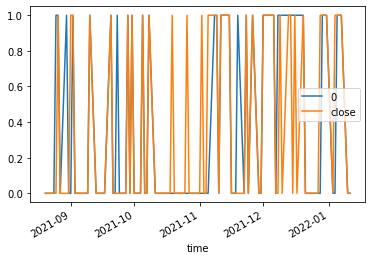

In [271]:
ax = trained_predictions.plot()
y_test.plot(ax=ax)

In [272]:
trained_predictions.cumsum()

,0
time,
2021-08-20 00:00:00-04:00,0.0
2021-08-23 00:00:00-04:00,0.0
2021-08-24 00:00:00-04:00,0.0
2021-08-25 00:00:00-04:00,1.0
2021-08-26 00:00:00-04:00,2.0
...,...
2022-01-05 00:00:00-05:00,36.0
2022-01-06 00:00:00-05:00,37.0
2022-01-07 00:00:00-05:00,38.0


In [273]:
trained_predictions.value_counts()

0.0    62
1.0    38
dtype: int64

In [274]:
y_test.value_counts()

close
0        63
1        37
dtype: int64

In [275]:
from sklearn.metrics import accuracy_score

In [276]:
accuracy_score(trained_predictions, y_test)

0.85

In [ ]:
# begin test of output. 
# first test multiplies signal by pct change. 
# second test takes into account a starting amount of money, buys and sells a certain amount per day.
# third test keeps track of money available per day and puts a stop to buying when run out
# fourth test sells all if money is run out on next sell signal.
# fifth test sells all on next sell signal if available money is down to a third of the amount initially available.
# try to add feature to prevent any short selling when shares not available.

In [ ]:
close_df[]

False

In [159]:
# # pseudocode outline:

# function to get price history - args are stock ticker/s, amount of days
# 	call alpaca
# 	return dataframe

# function to get twitter history
# 	possibly filter for repeated tweets
# 	return signal

# function to get news history
# 	return signal

# function to get reddit history
# 	return signal

# function to get general sentiment signals history
# 	call function to get twitter history
# 	call function to get news history
# 	call function to get reddit history
# 	return combined dataframe of signals


# function to get sentiment signals history of specific stock - arg is stock ticker
# 	call function to get twitter history
# 	call function to get news history
# 	call function to get reddit history
# 	return combined dataframe of signals

# function to run machine learning - arg is combined signals and stock history
# 	add additional columns for each signal for a daily percent change and a 5 day moving average a 100 day moving average
# 	scale
# 	train/test split
# 	try a few machine learning possibilities, svm, adaboost, possibly neural - try to guess if it will go up or down the following day

# 	try the following : reduce overfitting with early stopping
	
# 	neural - y is determined by whether it goes up or down the following day. two output neurons, highest one is selected to make signal.
# 	check amount correct, amount incorrect, and difference between actual and strategy.	

# 	neural 2nd stage - train only on the indexes which were incorrectly predicted.

	




# 	return buy/sell signal

# make function to calculate returns:
# don't use the function that just multiplies the signals by pct_return
# track the amount spent on each buy and amount returned on each sell.
# plot the total amount invested at any one time.
# possibly put a cutoff if no more money is available.
# possibly put a stop if unable to sell short.
# at the end, sell all or buy all short positions, get end result.
# compare to if the full amount initially available was all spent to purchase the stock at
# the beginning of the test period.


# Main function:
# 	determine which stocks to pull, one or many

# 	call function to get price history

# 	call function to get general sentiment signals history

# 	call function to get sentiment signals history for specific stock/s

# 	call function to run machine learning on the price history and signals

# 	output graphs





# terms to use in signal search for general:
# green
# renewable
# environment
# climate
# global warming
# climate crisis
# natural disaster
